# Matplotlib


Matplotlib is a popular plotting software. It's name comes from "MATLAB like Plotting library" <br> In this section we will be using a module called pyplot from matlplotlib. A wide range of statistical plots like bar diagrams, pie charts, histograms etc. can be shown using Matplotlib<br>

In [4]:
from matplotlib import pyplot as plt
import numpy as np

## Plotting graphs
Let's make a simple $y$ vs $x$ graph for the function $y(x)$ = $3x$ + 4

In [5]:
x = np.linspace(-10,10,100)
y = 3*x + 4

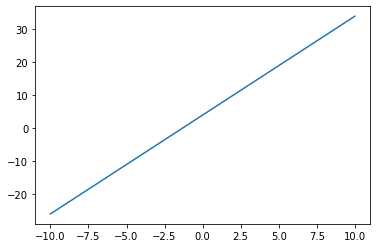

In [6]:
plt.plot(x,y)

Let's try plotting any quadratic function, say $y(x)$ = $x^2$

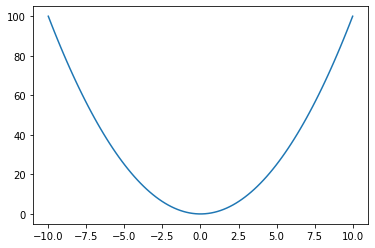

In [7]:
y = x**2
plt.plot(x, y)

Observe that the plot functions plots the best fit inspite of giving only discrete points as inputs.

Let's consider a noisy data i.e, a data which doesn't have a perfect fit 

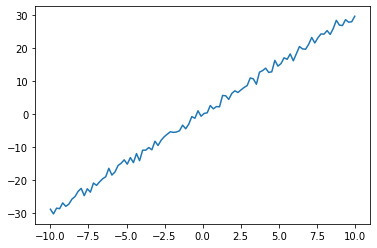

In [8]:
# Samples random values from standard normal distribution (Size = 100)
noise = np.random.randn(100)
# Create a lin-spaced array x with 100 elements
x = np.linspace(-10,10,100)
y = 3*x + noise
plt.plot(x,y);

The plot function tries to give a good fit to the curve

## Scatter Plots

In the above example, let's increase the data from 100 to 1000

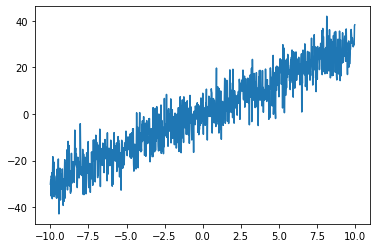

In [9]:
noise = np.random.randn(1000)
x = np.linspace(-10,10,1000)
y = 3*x + 6*noise
plt.plot(x,y);

The plot does look messy right! We use scatter plots when we want to plot the data points without any curve to fit them

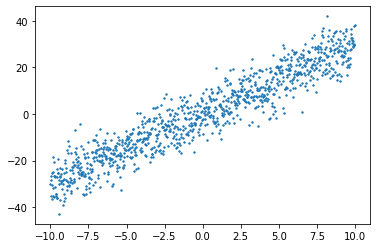

In [10]:
plt.scatter(x,y,s=2);

## Histograms 

To get a better understanding of normal distribution, we can use histograms

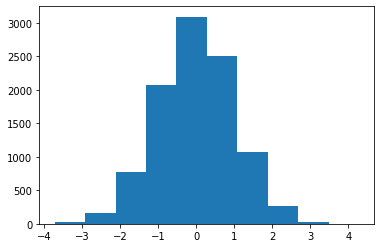

In [11]:
# A 1D array of size 10k
x = np.random.randn(10000)
plt.hist(x);

plt.hist() function takes an argument called 'bins'. When it takes positive integral value it defines the number of equal-width bins (Class Intervals) in the range.

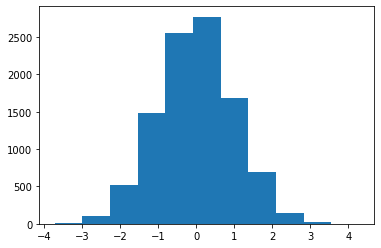

In [12]:
plt.hist(x, bins = 11);

Play around with the value of bins, see what happens when you increase it

# Important visualisations for developing insights from the data

A small set of imports to help improve the visualisations. Seaborn is another visualisation library just like matplotlib. We will use this library in this notebook.

To install:
```pip3 install --user seaborn```

```conda install -c anaconda seaborn```

**Hey I have also used pandas which is another library in python for reading csv files. We will cover things related to this in the next tutorial but for now please bear with me. This notebook is to show the kind of tools we can use for visualising data**

In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (10, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.5.2
0.11.2


## Pie charts are a classic way to show the composition of groups. Its imperative to show the percentages as it can be very misleading to view it just like that.

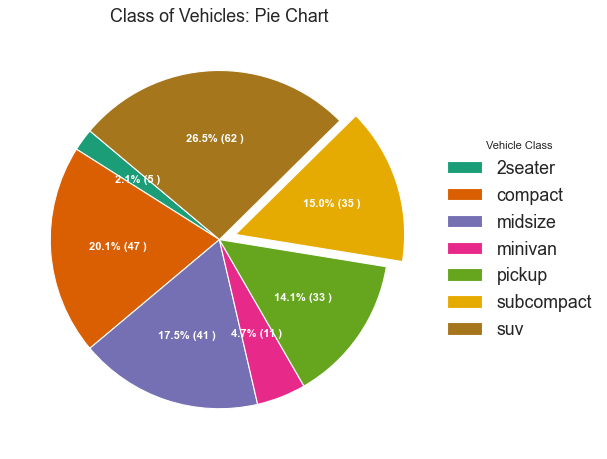

In [25]:
# Import
df_raw = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['counts']
categories = df['class']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

## Bar Plots are a classic way of visualizing items based on counts or any given metric. In below chart, I have used a different color for each item, but you might typically want to pick one color for all items unless you to color them by groups.

/var/folders/54/ccfr7ph1425cvxjxllgbr1mw0000gn/T/ipykernel_1815/1058562133.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')


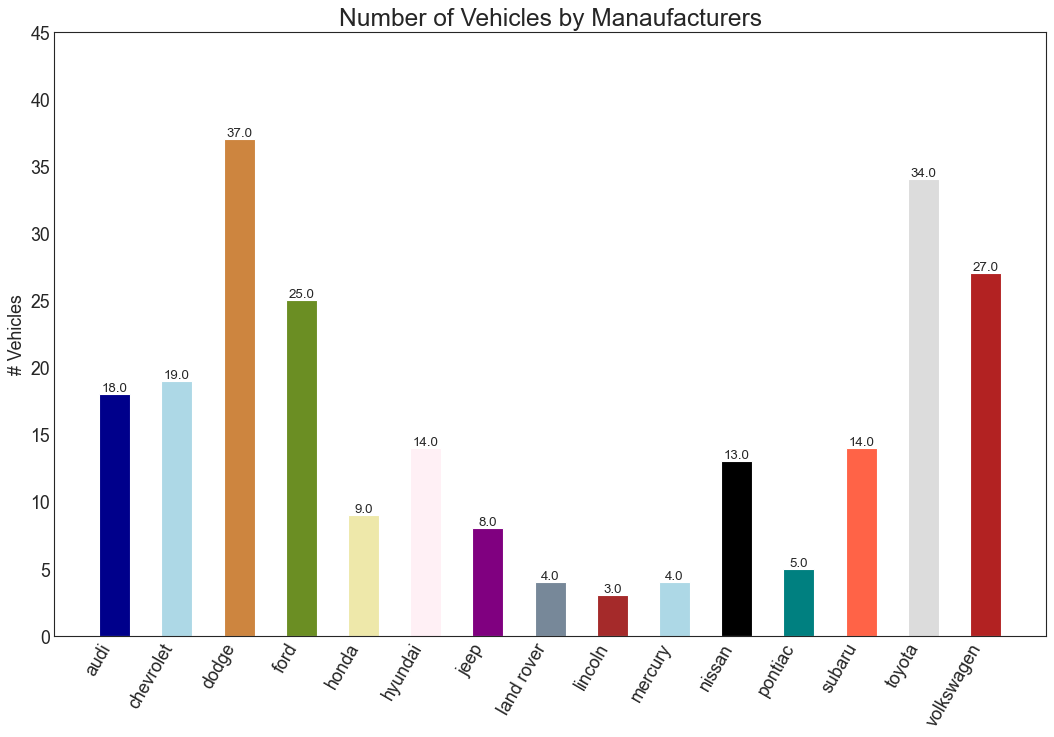

In [26]:
import random

# Import Data
df_raw = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()

## Categorical Box plots for different subclasses to a specific class

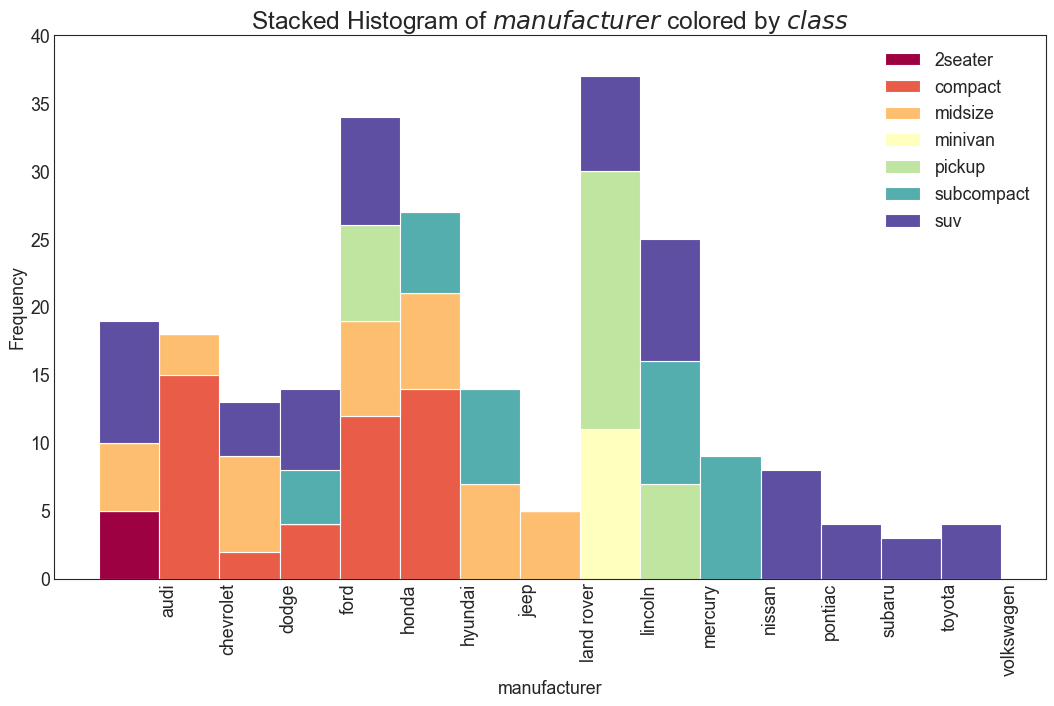

In [36]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
plt.xticks(ticks=bins[1:], labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

## Population pyramid can be used to show the distribution of the groups at a particular stage.


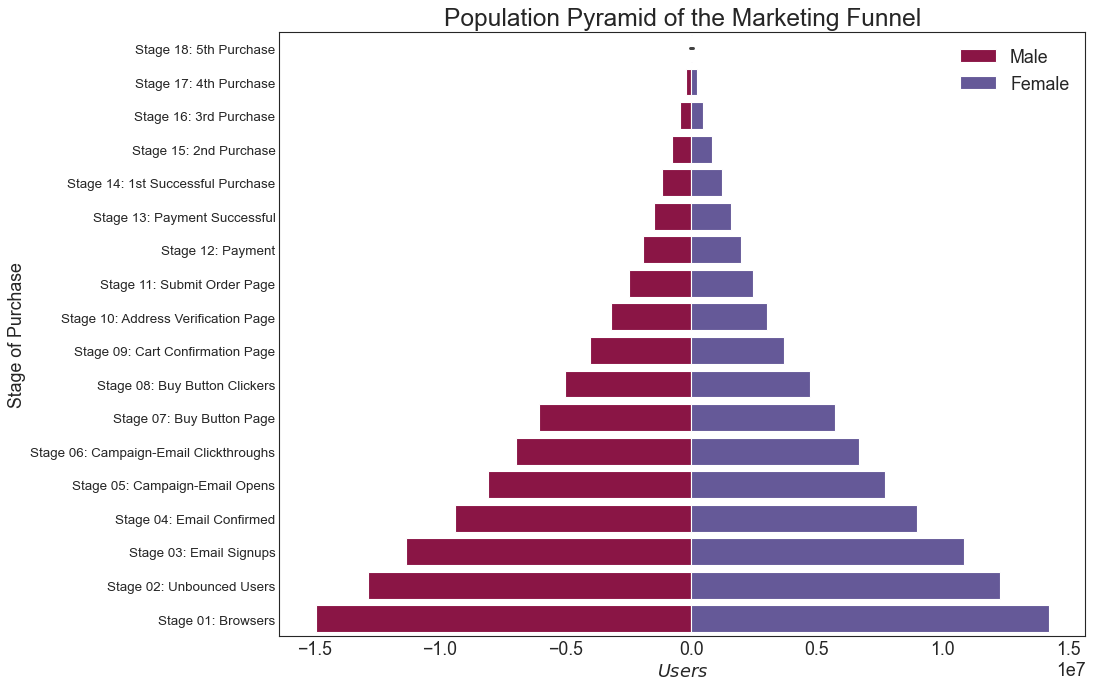

In [29]:
# Read data
df = pd.read_csv("data/email_campaign_funnel.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

## Box plots are a great way to visualize the distribution, keeping the median, 25th 75th quartiles and the outliers in mind. 

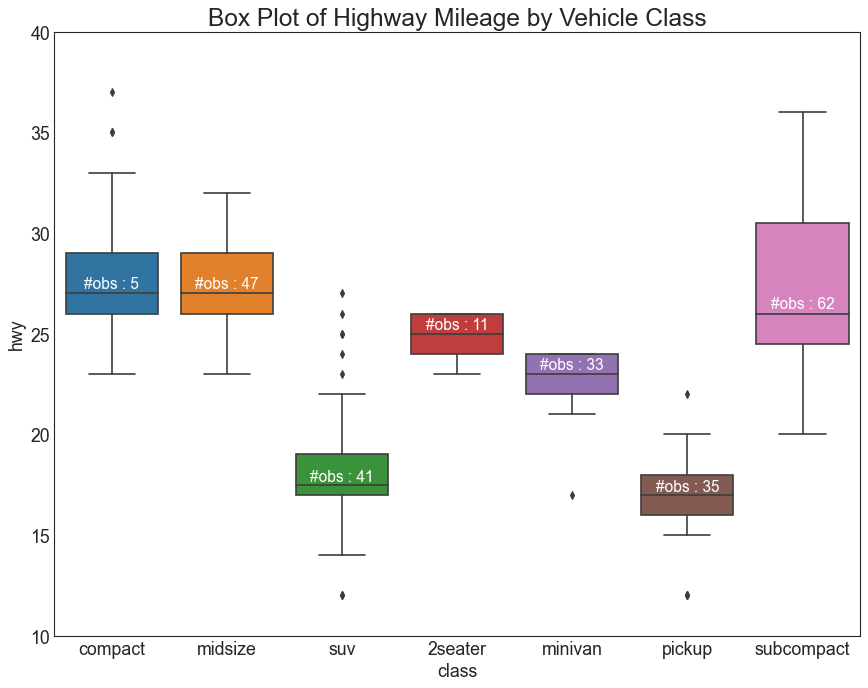

In [31]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')    

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

## Density plots to find the probability density distribution of a numerical variable 

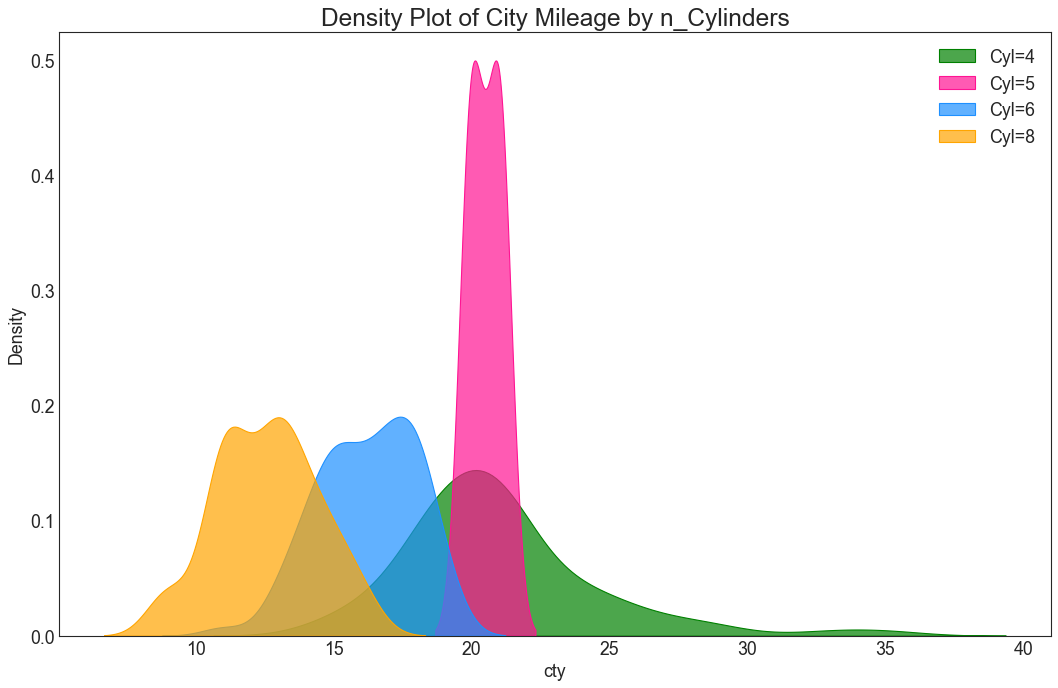

In [32]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

## Diverging bars for visualising deviation from the mean

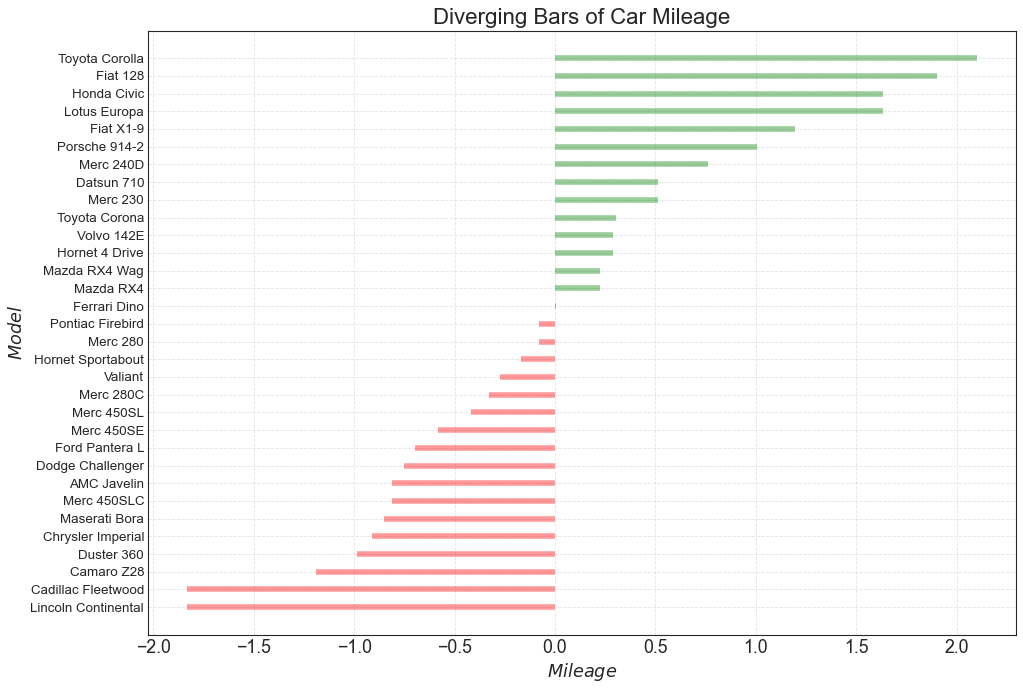

In [33]:
# Prepare Data
df = pd.read_csv("data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Jittering scatter plots Often multiple datapoints have exactly the same X and Y values. As a result, multiple points get plotted over each other and hide. To avoid this, jitter the points slightly so you can visually see them. 

/opt/miniconda3/envs/torch-nightly/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


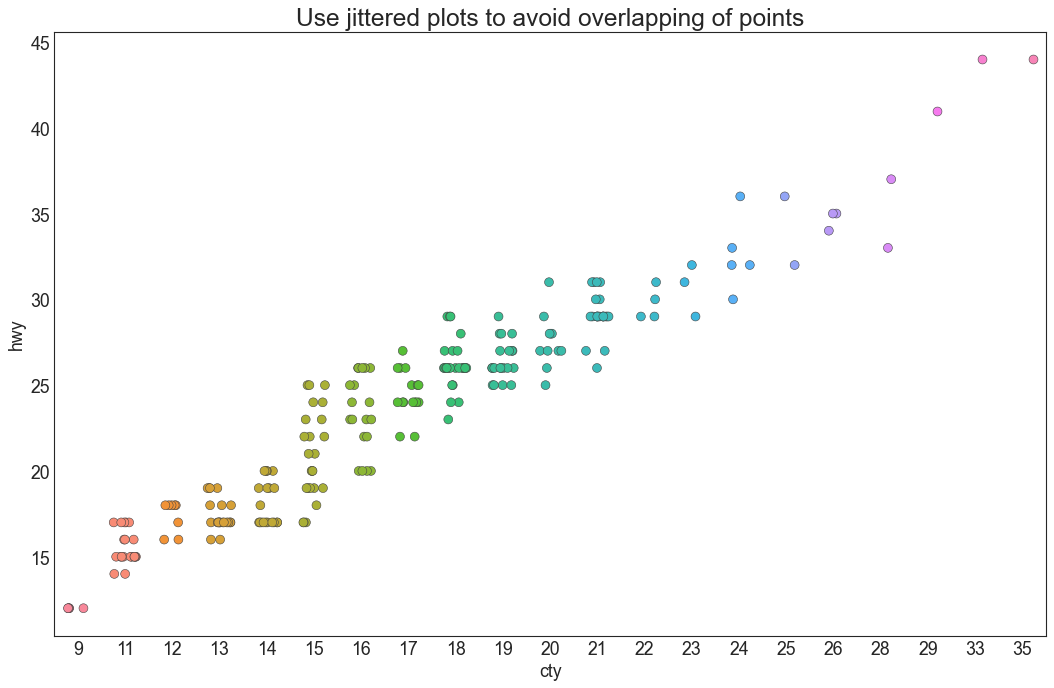

In [34]:
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()